# Pipeline
> ## ngramize->콜금리와merge-> 
> ## word polarity 계산->
> ## sent_tone, doc_tone계산->
> ## tone과 기준금리 비교시각화, corr계산

In [75]:
from ekonlpy.tag import Mecab
import pandas as pd
import glob
from tqdm import tqdm
from ekonlpy.sentiment import MPCK
import re

In [394]:
news_bond_mpb = pd.read_pickle('전부점스플릿 문장토큰화.pkl')

In [22]:
from ekonlpy.sentiment import MPCK
mpck = MPCK()

In [396]:
# 문장별로 나눠진 데이터 ngramize
import pickle
ngram_list=[]
for i in tqdm(range(len(news_bond_mpb['body']))):
    try:
        sent_ngram=[]
        sent=news_bond_mpb['body'][i]
        for s in sent:
            ngrams = mpck.ngramize(mpck.tokenize(s),keep_overlapping_ngram=False)
            if ngrams:
                sent_ngram.append(ngrams)
        ngram_list.append(sent_ngram)
    except:
        print(i)
# unigram 은 아예 단어장에 포함되지 않으므로 노력할 필요 없음
#저장코드
news_bond_mpb['ngramized']=ngram_list
import pickle
news_bond_mpb.to_pickle('ngramized_news_bond_mpb.pkl')

100%|████████████████████████████████████████████████████████████████████████████| 4617/4617 [1:28:32<00:00,  1.15s/it]


AttributeError: 'list' object has no attribute 'to_pickle'

In [439]:
news_bond_mpb['ngramized'][0]

[['수익성/NNG;향상/NNG', '최대/NNG'],
 ['외형/NNG;성장/NNG'],
 ['자산/NNG;건전성/NNG;개선/NNG',
  '수익성/NNG;악화/NNG',
  '금리/NNG;인하/NNG',
  '악화/NNG;조짐/NNG',
  '순이익/NNG;늘/VV',
  '수입/NNG;늘/VV'],
 ['안정/NNG'],
 ['생산성/NNG;향상/NNG', '외형/NNG;성장/NNG', '최대/NNG'],
 ['자산/NNG;늘/VV'],
 ['향상/NNG'],
 ['개선/NNG'],
 ['수익성/NNG;악화/NNG', '악화/NNG;조짐/NNG', '개선/NNG'],
 ['건전성/NNG;높/VA'],
 ['무수익여신/NNG;증가/NNG', '악화/NNG'],
 ['향상/NNG'],
 ['수익성/NNG;악화/NNG'],
 ['악화/NNG'],
 ['수익성/NNG;악화/NNG', '연체율/NNG;높/VA', '우려/NNG'],
 ['대출심사/NNG;강화/NNG', '위축/NNG'],
 ['하락/NNG'],
 ['대출/NNG;연체율/NNG;오르/VV', '연체율/NNG;낮/VV'],
 ['대출/NNG;연체율/NNG;오르/VV', '우려/NNG'],
 ['대출/NNG;연체율/NNG;높/VA'],
 ['대출심사/NNG;강화/NNG', '자산/NNG;건전/NNG'],
 ['급락/NNG'],
 ['하락/NNG'],
 ['하락/NNG'],
 ['금리/NNG;인상/NNG'],
 ['최대/NNG'],
 ['금리/NNG;인상/NNG'],
 ['금리/NNG;인상/NNG;긴축/NNG'],
 ['경기/NNG;둔화/NNG', '물가/NNG;오르/VV'],
 ['낙관/NNG'],
 ['인플레이션/NNG;압력/NNG;억제/NNG', '견조/NNG', '성장/NNG'],
 ['둔화/NNG'],
 ['지표/NNG;예상/NNG;나쁘/VA', '악화/NNG', '우려/NNG'],
 ['실적/NNG;양호/NNG', '전망/NNG;실망/NNG', '최대/NNG'],
 ['실망/NNG'],
 [

# mpb 문장별 ngramize

In [341]:
# # 기사 문장별 split 후 ngramize
#mpb = pd.read_pickle('mkb_0729.pkl')
# ngram_list=[]
# for i in tqdm(range(len(mpb['body']))):
#     try:
#         sent_ngram=[]
#         sent=mpb['body'][i].split('.')
#         for s in sent:
#             ngrams = mpck.ngramize(mpck.tokenize(s),keep_overlapping_ngram=False)
#             if ngrams:
#                 sent_ngram.append(ngrams)
#         ngram_list.append(sent_ngram)
#     except:
#         print(i)
# mpb['ngram']=ngram_list
# mpb.to_pickle('mpb0730.pkl')

100%|████████████████████████████████████████████████████████████████████████████████| 148/148 [00:55<00:00,  2.68it/s]


# 여기까지 ngramized 완료됨, (파일명:ngramized_news_bond_mpb.pkl)

---

# 필요한 파일
# - ngramized_news_bond_mpb.pkl : ngramize된 모든파일
# - mpb0730.pkl : ngramize된 의사록 
# - callrate_month_upanddown.csv : 콜금리
# - 전체기간_기준금리.pkl : 기준금리

In [440]:
#불러오기
news_bond_mpb = pd.read_pickle('ngramized_news_bond_mpb.pkl')
callrate = pd.read_csv('callrate_month_upanddown.csv')
mpb= pd.read_pickle('mpb0730.pkl')
rate = pd.read_pickle('전체기간_기준금리.pkl')

In [403]:
callrate = callrate[30:4658][['date','up_down']]
callrate = callrate.rename(columns={'date':'time'})
callrate = callrate.set_index('time')
result_set = news_bond_mpb.merge(callrate, left_index=True, right_index=True)

,body,ngramized,up_down
time,,,
2005-05-01,"[이른바 은행들의 전쟁 원년인 올해 4대 시중은행의 초반 전적표가 나왔다, 1일 금...","[[수익성/NNG;향상/NNG, 최대/NNG], [외형/NNG;성장/NNG], [자...",상승
2005-05-02,[조정을 거친 한진해운 이 반등에성공할 수 있을까 한진해운 주가는 연초 천원대에서 ...,"[[미/NNG;경기/NNG;둔화/NNG;우려/NNG, 성공/NNG, 절상/NNG],...",상승
2005-05-03,"[환율이 소폭 상승했다, 3일 서울 외환시장에서 원달러 환율은 전날 종가대비 달러...","[[저점/NNG;경계/NNG], [fed/NNG;ff/NNG;금리/NNG;인상/NN...",상승
2005-05-04,[미국 연방준비제도이사회(FRB)가3일(현지시간) 연방기금 금리를 5 포인트 인상하...,"[[인상/NNG], [fed/NNG;금리/NNG;인상/NNG], [인플레이션/NNG...",하락
2005-05-05,[국내외 증시가 그동안의 약세에서 벗어나 오름세를 나타내면서 상승 추세로의 복귀 가...,"[[기대/NNG;높/VA], [금리/NNG;인상/NNG;우려/NNG], [세계/NN...",하락


# result_set이 call금리랑 ngramize까지 합쳐서 완료된거

In [88]:
# 참고용 논문저자가 만든 ngram사전
vocab = pd.read_csv('mp_polarity_vocab.txt', delimiter=' ', header=None, names=['ngram','n'])

## 토큰뭉치들의 빈도 수 세기

In [441]:
from collections import defaultdict

# 범주에 속하는 토큰수 세기 0(hawkish), 1(dovish)
haw_cnt = 0
dov_cnt = 0

# 토큰별로 문서내 빈도수 카운팅
wordfreq = defaultdict(lambda : [0, 0])

#label 0 이 hawkish   1은 dovish라 가정
for doc_ngrams, label in zip(result_set['ngramized'], result_set['up_down']) :
    
    for sent_ngram in doc_ngrams:
        for ngram in sent_ngram:
            if label == '상승':
                wordfreq[ngram][0] += 1
            elif label == '하락':
                wordfreq[ngram][1] += 1

for key, (cnt0, cnt1) in wordfreq.items():
    haw_cnt += cnt0
    dov_cnt += cnt1

print('haw_cnt : {}'.format(haw_cnt))
print('dov_cnt : {}'.format(dov_cnt))
print('wordfreq 사이즈 : {}'.format(len(wordfreq)))
################################


# del cur['key']

import copy##deepcopy해야됨!
wordfreq_origin = copy.deepcopy(wordfreq)

haw_cnt : 1188481
dov_cnt : 1338762
wordfreq 사이즈 : 61103


# -  tone하고 전체기간기준금리 합쳐서 결과값 계산

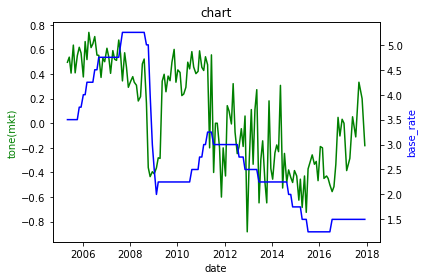

param_wordfreq : 13
param_threshold : 1.0
param_sent_threshold : 0
corr : 0.608


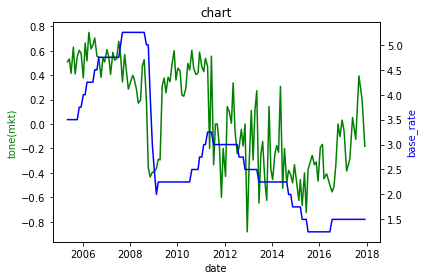

param_wordfreq : 14
param_threshold : 1.0
param_sent_threshold : 0
corr : 0.609


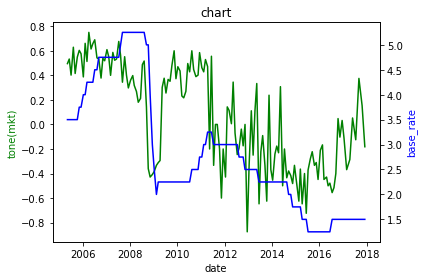

param_wordfreq : 15
param_threshold : 1.0
param_sent_threshold : 0
corr : 0.608


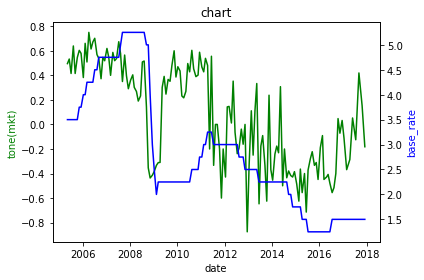

param_wordfreq : 16
param_threshold : 1.0
param_sent_threshold : 0
corr : 0.605


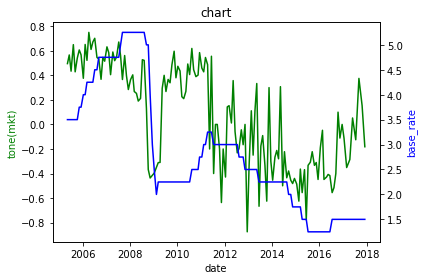

param_wordfreq : 17
param_threshold : 1.0
param_sent_threshold : 0
corr : 0.601


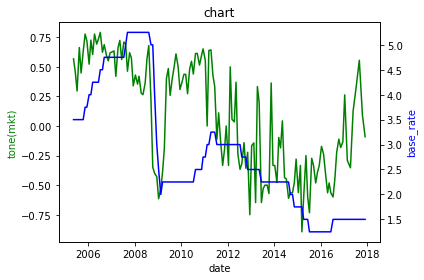

param_wordfreq : 13
param_threshold : 1.1
param_sent_threshold : 0
corr : 0.615


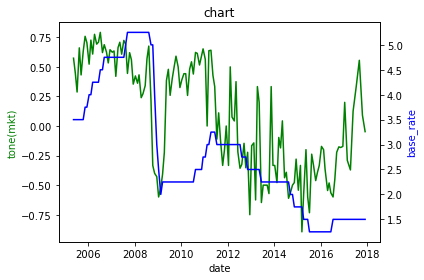

param_wordfreq : 14
param_threshold : 1.1
param_sent_threshold : 0
corr : 0.617


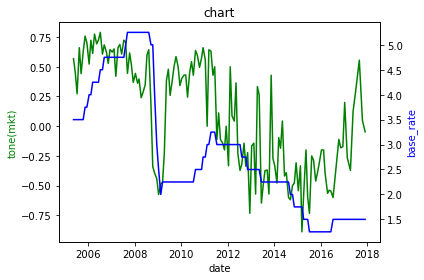

param_wordfreq : 15
param_threshold : 1.1
param_sent_threshold : 0
corr : 0.618


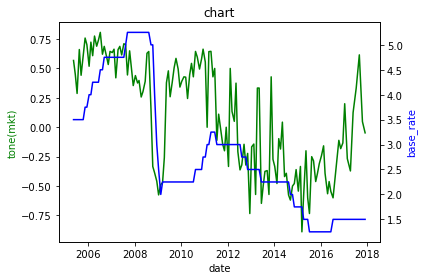

param_wordfreq : 16
param_threshold : 1.1
param_sent_threshold : 0
corr : 0.619


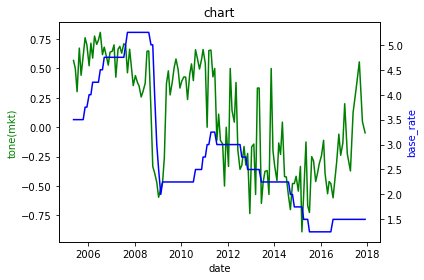

param_wordfreq : 17
param_threshold : 1.1
param_sent_threshold : 0
corr : 0.614


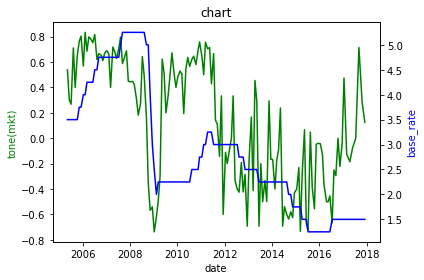

param_wordfreq : 13
param_threshold : 1.2
param_sent_threshold : 0
corr : 0.557


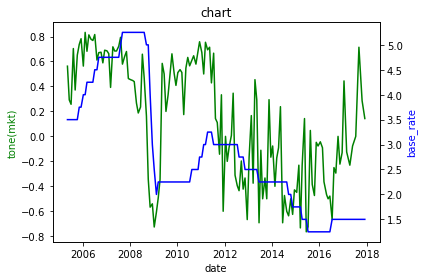

param_wordfreq : 14
param_threshold : 1.2
param_sent_threshold : 0
corr : 0.558


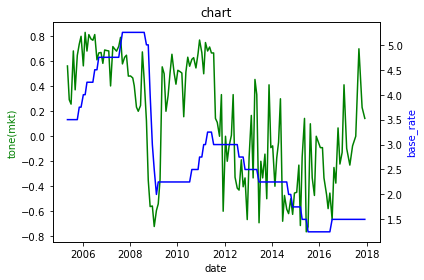

param_wordfreq : 15
param_threshold : 1.2
param_sent_threshold : 0
corr : 0.555


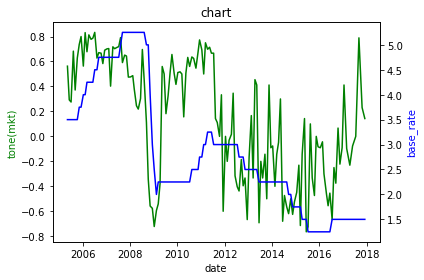

param_wordfreq : 16
param_threshold : 1.2
param_sent_threshold : 0
corr : 0.555


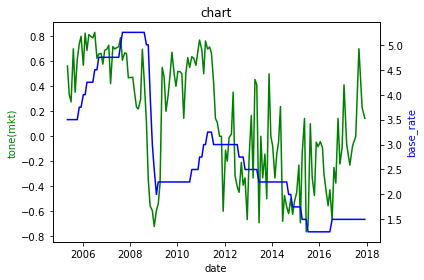

param_wordfreq : 17
param_threshold : 1.2
param_sent_threshold : 0
corr : 0.555


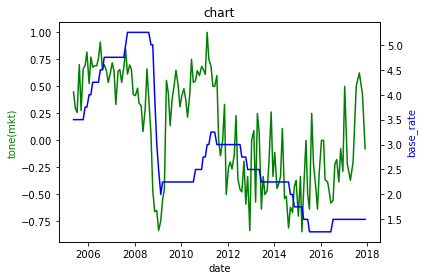

param_wordfreq : 13
param_threshold : 1.3
param_sent_threshold : 0
corr : 0.54


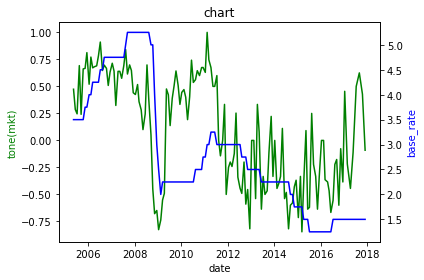

param_wordfreq : 14
param_threshold : 1.3
param_sent_threshold : 0
corr : 0.543


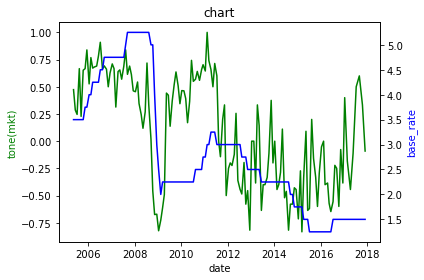

param_wordfreq : 15
param_threshold : 1.3
param_sent_threshold : 0
corr : 0.546


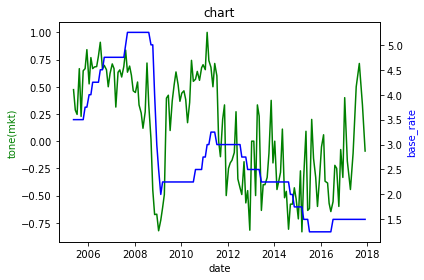

param_wordfreq : 16
param_threshold : 1.3
param_sent_threshold : 0
corr : 0.543


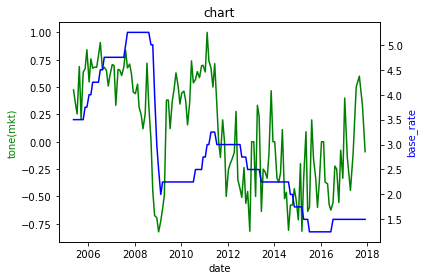

param_wordfreq : 17
param_threshold : 1.3
param_sent_threshold : 0
corr : 0.545


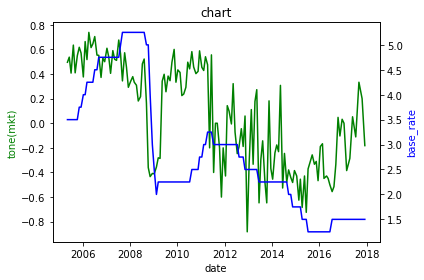

param_wordfreq : 13
param_threshold : 1.0
param_sent_threshold : 0.1
corr : 0.606


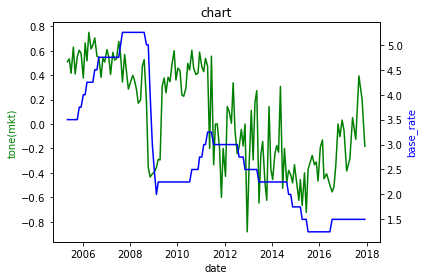

param_wordfreq : 14
param_threshold : 1.0
param_sent_threshold : 0.1
corr : 0.608


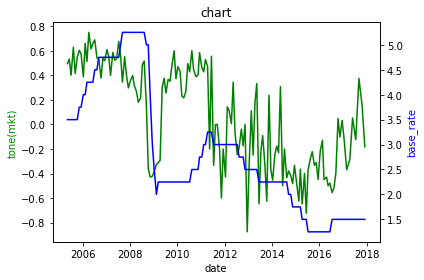

param_wordfreq : 15
param_threshold : 1.0
param_sent_threshold : 0.1
corr : 0.607


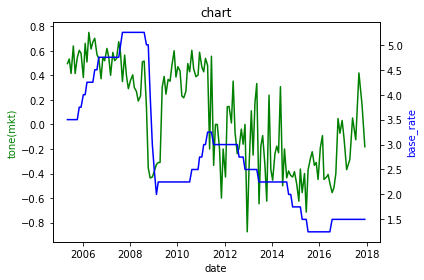

param_wordfreq : 16
param_threshold : 1.0
param_sent_threshold : 0.1
corr : 0.604


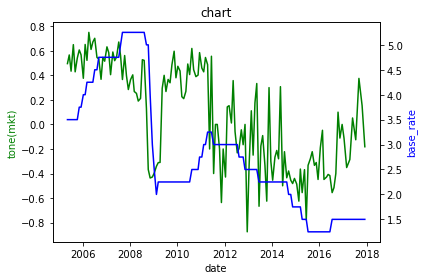

param_wordfreq : 17
param_threshold : 1.0
param_sent_threshold : 0.1
corr : 0.6


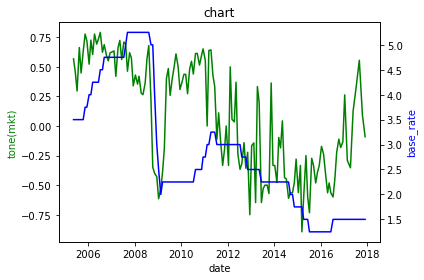

param_wordfreq : 13
param_threshold : 1.1
param_sent_threshold : 0.1
corr : 0.615


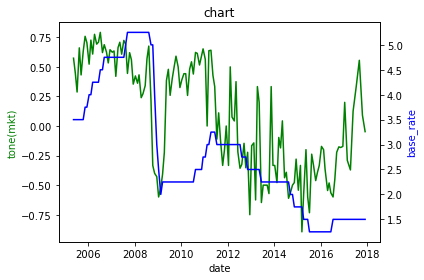

param_wordfreq : 14
param_threshold : 1.1
param_sent_threshold : 0.1
corr : 0.617


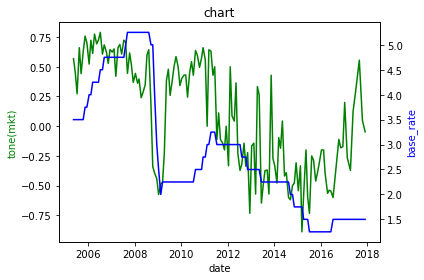

param_wordfreq : 15
param_threshold : 1.1
param_sent_threshold : 0.1
corr : 0.618


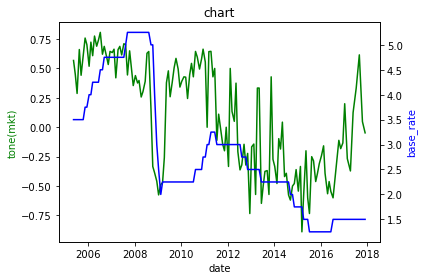

param_wordfreq : 16
param_threshold : 1.1
param_sent_threshold : 0.1
corr : 0.619


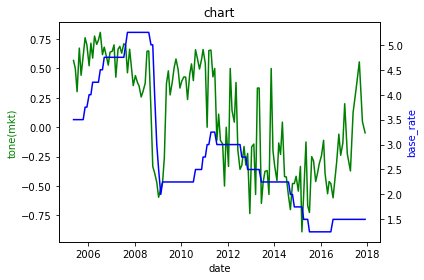

param_wordfreq : 17
param_threshold : 1.1
param_sent_threshold : 0.1
corr : 0.614


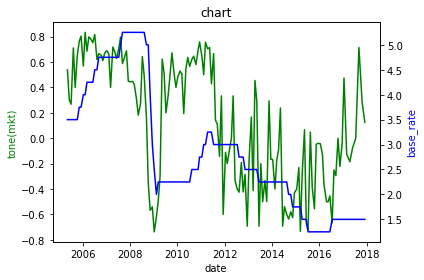

param_wordfreq : 13
param_threshold : 1.2
param_sent_threshold : 0.1
corr : 0.557


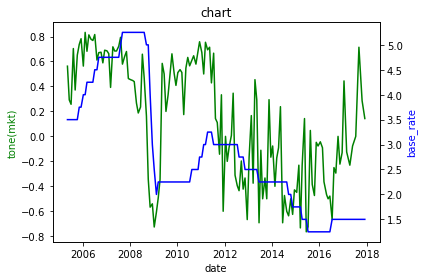

param_wordfreq : 14
param_threshold : 1.2
param_sent_threshold : 0.1
corr : 0.558


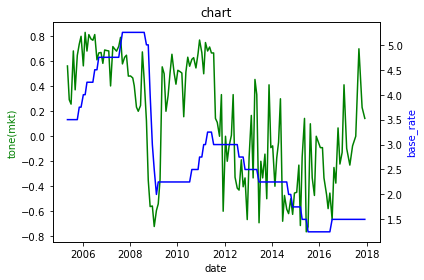

param_wordfreq : 15
param_threshold : 1.2
param_sent_threshold : 0.1
corr : 0.555


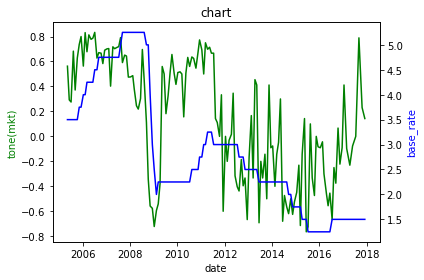

param_wordfreq : 16
param_threshold : 1.2
param_sent_threshold : 0.1
corr : 0.555


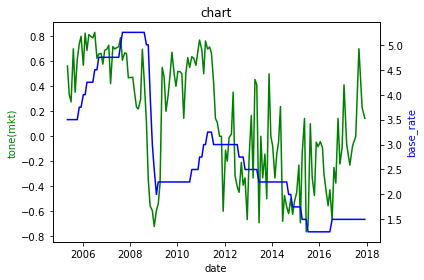

param_wordfreq : 17
param_threshold : 1.2
param_sent_threshold : 0.1
corr : 0.555


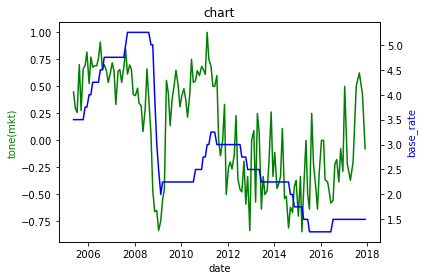

param_wordfreq : 13
param_threshold : 1.3
param_sent_threshold : 0.1
corr : 0.54


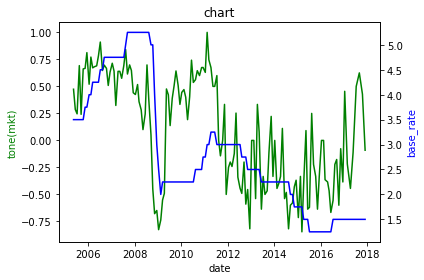

param_wordfreq : 14
param_threshold : 1.3
param_sent_threshold : 0.1
corr : 0.543


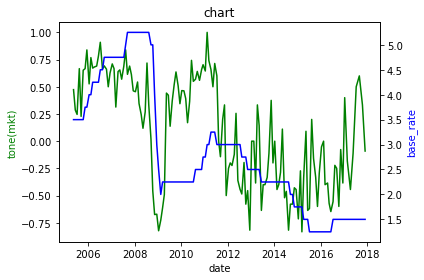

param_wordfreq : 15
param_threshold : 1.3
param_sent_threshold : 0.1
corr : 0.546


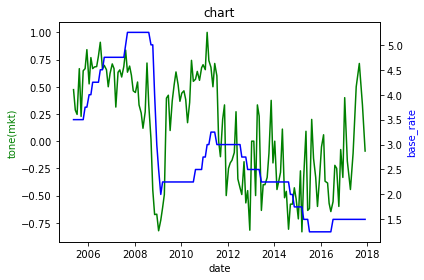

param_wordfreq : 16
param_threshold : 1.3
param_sent_threshold : 0.1
corr : 0.543


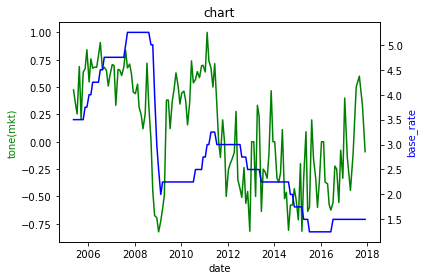

param_wordfreq : 17
param_threshold : 1.3
param_sent_threshold : 0.1
corr : 0.545


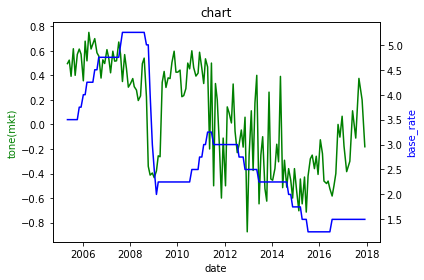

param_wordfreq : 13
param_threshold : 1.0
param_sent_threshold : 0.2
corr : 0.603


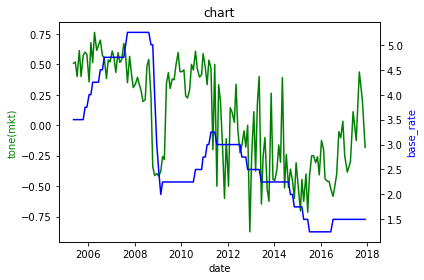

param_wordfreq : 14
param_threshold : 1.0
param_sent_threshold : 0.2
corr : 0.603


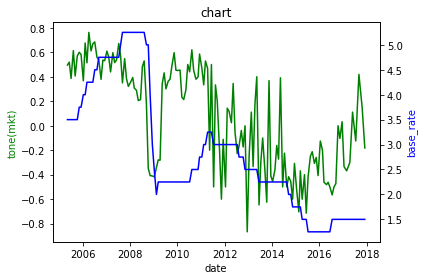

param_wordfreq : 15
param_threshold : 1.0
param_sent_threshold : 0.2
corr : 0.601


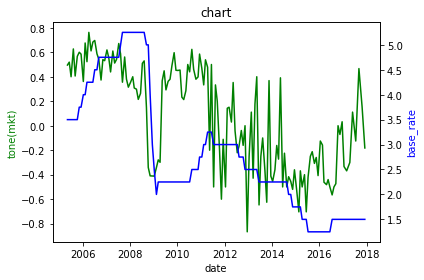

param_wordfreq : 16
param_threshold : 1.0
param_sent_threshold : 0.2
corr : 0.6


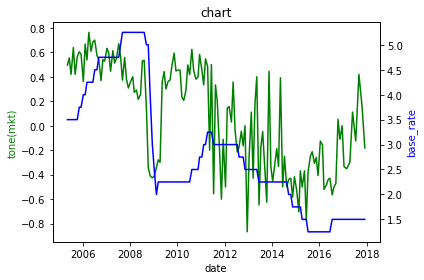

param_wordfreq : 17
param_threshold : 1.0
param_sent_threshold : 0.2
corr : 0.599


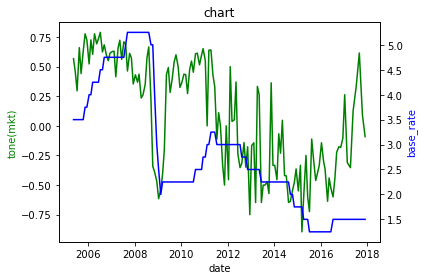

param_wordfreq : 13
param_threshold : 1.1
param_sent_threshold : 0.2
corr : 0.606


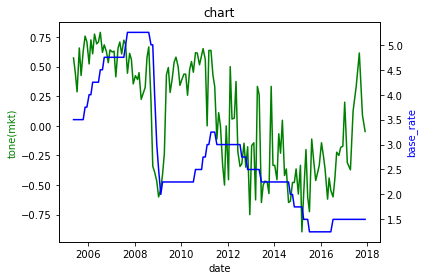

param_wordfreq : 14
param_threshold : 1.1
param_sent_threshold : 0.2
corr : 0.608


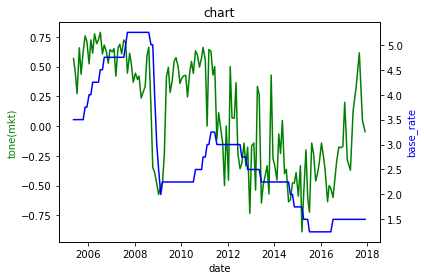

param_wordfreq : 15
param_threshold : 1.1
param_sent_threshold : 0.2
corr : 0.61


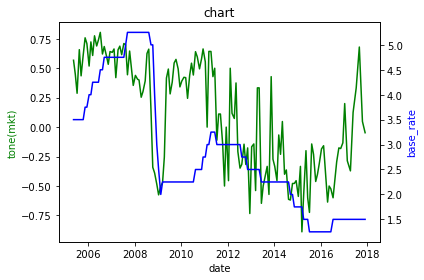

param_wordfreq : 16
param_threshold : 1.1
param_sent_threshold : 0.2
corr : 0.611


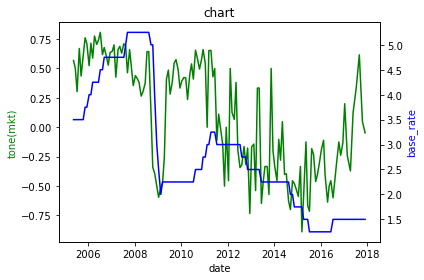

param_wordfreq : 17
param_threshold : 1.1
param_sent_threshold : 0.2
corr : 0.611


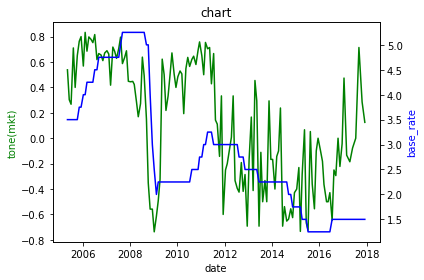

param_wordfreq : 13
param_threshold : 1.2
param_sent_threshold : 0.2
corr : 0.555


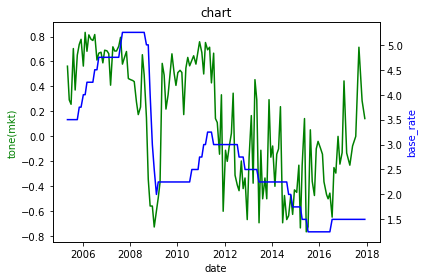

param_wordfreq : 14
param_threshold : 1.2
param_sent_threshold : 0.2
corr : 0.558


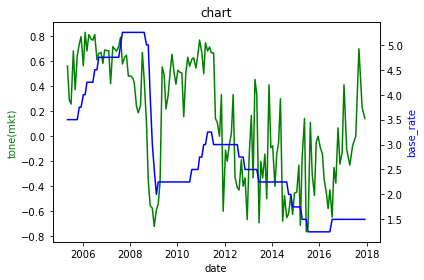

param_wordfreq : 15
param_threshold : 1.2
param_sent_threshold : 0.2
corr : 0.555


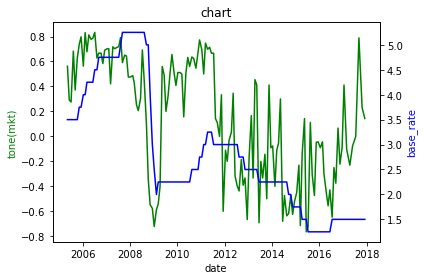

param_wordfreq : 16
param_threshold : 1.2
param_sent_threshold : 0.2
corr : 0.555


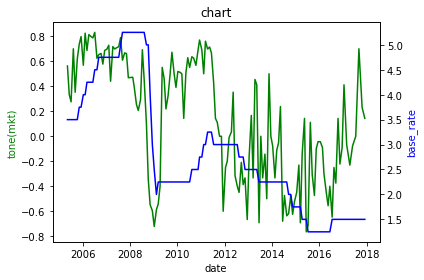

param_wordfreq : 17
param_threshold : 1.2
param_sent_threshold : 0.2
corr : 0.554


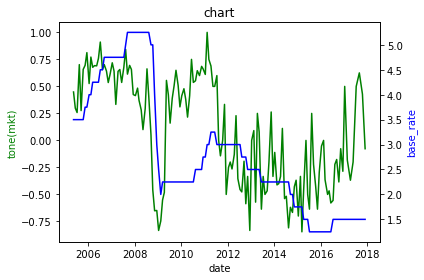

param_wordfreq : 13
param_threshold : 1.3
param_sent_threshold : 0.2
corr : 0.542


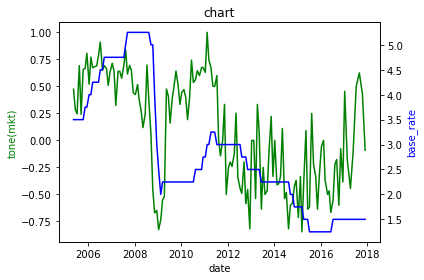

param_wordfreq : 14
param_threshold : 1.3
param_sent_threshold : 0.2
corr : 0.545


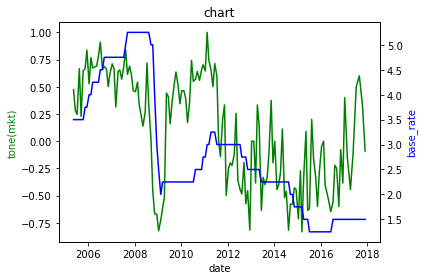

param_wordfreq : 15
param_threshold : 1.3
param_sent_threshold : 0.2
corr : 0.547


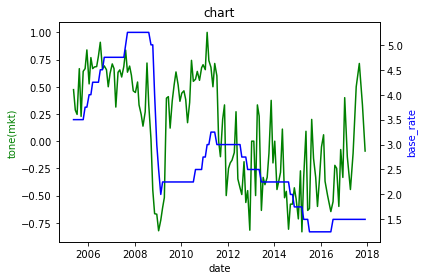

param_wordfreq : 16
param_threshold : 1.3
param_sent_threshold : 0.2
corr : 0.544


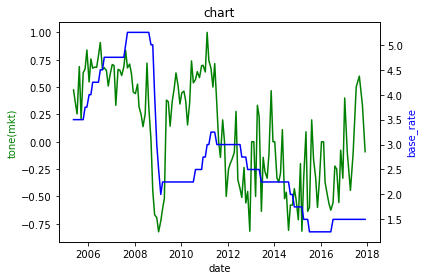

param_wordfreq : 17
param_threshold : 1.3
param_sent_threshold : 0.2
corr : 0.546


In [456]:
MAX_corr=0
good_threshold=[]
param_wordfreq_list=[13,14,15,16,17]
param_threshold_list=[1.0, 1.1,1.2,1.3]
param_sent_threshold_list=[0,0.1,0.2]
for param_sent_threshold in param_sent_threshold_list:
    for param_threshold in param_threshold_list:
        for param_wordfreq in param_wordfreq_list:
            wordfreq = copy.deepcopy(wordfreq_origin)
            for key, value in wordfreq_origin.items():
                if sum(value)<param_wordfreq:
                    del wordfreq[key]
            ###################
            haw_cnt = 0
            dov_cnt = 0
            for val in wordfreq.values():
                haw_cnt+=val[0]
                dov_cnt+=val[1]

            ################
            k=0.5
            for key, val in wordfreq.items():
                val.append((k+val[0])/(2*k+haw_cnt))
                val.append((k+val[1])/(2*k+dov_cnt))
                val.append(val[2]/val[3])
            #################

            for key, val in wordfreq.items():
                if val[4]>param_threshold:
                    wordfreq[key]=1
                elif val[4] < 1/param_threshold:
                    wordfreq[key]=-1
                else: wordfreq[key]=0

            #############################
            import numpy as np
            mpb['tone']=0
            tone_mpb_list=[]
            count_word=[]
            sentence_score_list=[]

            for i, doc in enumerate(mpb['ngram']):
                cnt=0
                sentence_score=[]
                for sentence in doc:

                    plus=0
                    minus=0
                    for ngram in sentence:
                        if ngram in wordfreq:

                            minus += wordfreq[ngram]
                            plus += np.abs(wordfreq[ngram])


                    if plus!=0:
                        cnt+=1
                        if minus/plus>param_sent_threshold:
                            sentence_score.append(1)
                        elif minus/plus<-param_sent_threshold:
                            sentence_score.append(-1)

                if sentence_score:
                    sentence_score_list.append(sentence_score)
                    tone_mpb = sum(sentence_score)/sum(list(map(abs, sentence_score)))###문서tone구하기
                else : tone_mpb =0
                tone_mpb_list.append(tone_mpb)
                count_word.append(cnt)

            mpb['tone'] = tone_mpb_list

            #################
            tone_rate = mpb.merge(rate, left_index=True, right_index=True, how='left' )

            import matplotlib.pyplot as plt
            fig, ax1 = plt.subplots()  #보조축 차트 만들기
            ax1.set_xlabel('date')
            ax1.set_ylabel('tone(mkt)', color='g')  #라인차트 컬러 지정
            ax1.plot(tone_rate['tone'], 'g-')  #라인차트 형태 지정
            ax2 = ax1.twinx()  #보조축을 위한 X축 공유 지정
            ax2.plot(tone_rate['base_rate'], 'b-')
            ax2.set_ylabel('base_rate', color='b')
            plt.title('chart')
            # plt.grid()
            fig.tight_layout()
            plt.show()
            print('param_wordfreq : {}'.format(param_wordfreq))
            print('param_threshold : {}'.format(param_threshold))
            print('param_sent_threshold : {}'.format(param_sent_threshold))
            print('corr : {}'.format(tone_rate[['tone','base_rate']].corr().iloc[0,1].round(3)))
            if MAX_corr<tone_rate[['tone','base_rate']].corr().iloc[0,1]:
                MAX_corr=tone_rate[['tone','base_rate']].corr().iloc[0,1]
                good_threshold=[param_wordfreq,param_threshold,param_sent_threshold]

In [451]:
MAX_corr

0.6193124738910668

In [452]:
good_threshold

[16, 1.1, 0]